# Apartat C

## Setup

* Importem les llibreries
* Configurem pandas
* Importem el dataset
* Inspeccionem les dimensions de les dades

In [39]:
## APARTADO C

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import normaltest, kstest

# Visualitzarem 4 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.4f' % x)

dataset = pd.read_csv("Consumo_cerveja.txt", header=0, delimiter=',', decimal=".", names=["DATA","TEMPMED","TEMPMIN","TEMPMAX","PREC","FINSEM","CONSUM"])
dataset = dataset.assign(DIFERENCIA= dataset.TEMPMAX - dataset.TEMPMIN)
dataset = dataset.assign(TEMPMITJA= (dataset.TEMPMAX + dataset.TEMPMIN + dataset.TEMPMED)/3)
dataset = dataset[["DATA","TEMPMED","TEMPMIN","TEMPMAX","PREC","FINSEM","DIFERENCIA", "TEMPMITJA", "CONSUM"]]
data = dataset.values
x = data[:, 1:-1]
y = data[:, -1]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)


Dimensionalitat de la BBDD: (365, 9)
Dimensionalitat de les entrades X (365, 7)
Dimensionalitat de l'atribut Y (365,)


## Mostrem les característiques del dataset

* Número d'entrades
* Descripció de les columnes
    * Nom de cada columna
    * Quantitat de registres amb valor
    * Si pot ser null o no
    * Tipus de dada

La part del tipus de dada es especialment important. Si les dades no s'importen com a números no podrem treballar correctament amb el dataset.

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATA        365 non-null    object 
 1   TEMPMED     365 non-null    float64
 2   TEMPMIN     365 non-null    float64
 3   TEMPMAX     365 non-null    float64
 4   PREC        365 non-null    float64
 5   FINSEM      365 non-null    int64  
 6   DIFERENCIA  365 non-null    float64
 7   TEMPMITJA   365 non-null    float64
 8   CONSUM      365 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 25.8+ KB


## Busquem valors nulls

No n'hi ha cap.

In [41]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
DATA          0
TEMPMED       0
TEMPMIN       0
TEMPMAX       0
PREC          0
FINSEM        0
DIFERENCIA    0
TEMPMITJA     0
CONSUM        0
dtype: int64


## Visualitzem els primers registres

In [42]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head()

Per visualitzar les primeres 5 mostres de la BBDD:


,DATA,TEMPMED,TEMPMIN,TEMPMAX,PREC,FINSEM,DIFERENCIA,TEMPMITJA,CONSUM
0,2015-01-01,27.3000,23.9000,32.5000,0.0000,0,8.6000,27.9000,25461
1,2015-01-02,27.0200,24.5000,33.5000,0.0000,0,9.0000,28.3400,28972
2,2015-01-03,24.8200,22.4000,29.9000,0.0000,1,7.5000,25.7067,30814
3,2015-01-04,23.9800,21.5000,28.6000,1.2000,1,7.1000,24.6933,29799
4,2015-01-05,23.8200,21.0000,28.3000,0.0000,0,7.3000,24.3733,28900


In [43]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


,TEMPMED,TEMPMIN,TEMPMAX,PREC,FINSEM,DIFERENCIA,TEMPMITJA,CONSUM
count,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000,365.0000
mean,21.2264,17.4614,26.6115,5.1967,0.2849,9.1501,21.7664,25401.3671
std,3.1801,2.8262,4.3174,12.4178,0.4520,3.1946,3.2318,4399.1427
min,12.9000,10.6000,14.5000,0.0000,0.0000,2.5000,12.8000,14343.0000
25%,19.0200,15.3000,23.8000,0.0000,0.0000,6.7000,19.5467,22008.0000
50%,21.3800,17.9000,26.9000,0.0000,0.0000,9.4000,21.9200,24867.0000
75%,23.2800,19.6000,29.4000,3.2000,1.0000,11.4000,23.9600,28631.0000
max,28.8600,24.5000,36.5000,94.8000,1.0000,18.1000,29.1400,37937.0000


## Mostrem correlacions

Mostrem les correlacions entre els atributs numerics.

El que ens importa especialment son les correlacions entre l'atribut de consum i la resta d'atributs.

Utilitzem el seguent criteri per les correlacions segons el seu valor absolut:
* \[0, 0.3) -> sense correlacio
* \[0.3, 0.5) -> correlacio baixa
* \[0.5, 0.7) -> correlacio mitja
* \[0.7, 0.9) -> correlacio alta
* \[0.9, 1\] -> correlacio molt alta

Veiem les seguents correlacions:
* Consum i temperatura mitjana: correlacio mitja
* Consum i temperatura minima: correlacio baixa
* Consum i temperatura maxima: correlacio mitja
* Consum i precipitacio: sense correlacio
* Consum i cap de setmana: correlacio mitja
      
No hi ha cap variable que tingui correlacio alta o molt alta amb el consum.
    

També hi ha correlacions mitjes o altes entre les diferents mostres de temperatures (minima, mitjana, maxima).

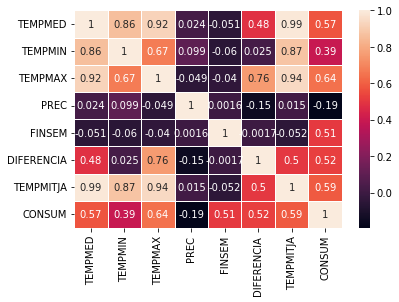

In [44]:
co = dataset.corr()
plt.figure()

ax = sns.heatmap(co, annot=True, linewidths=.5)

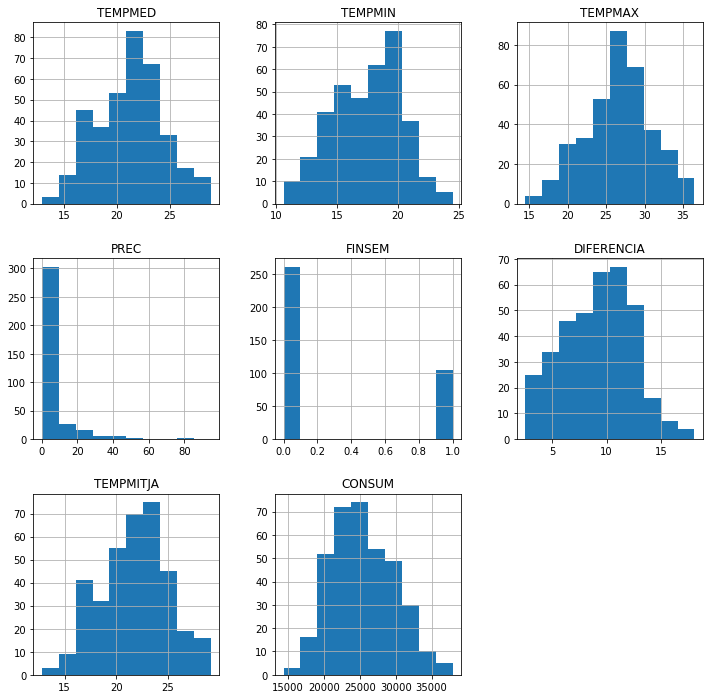

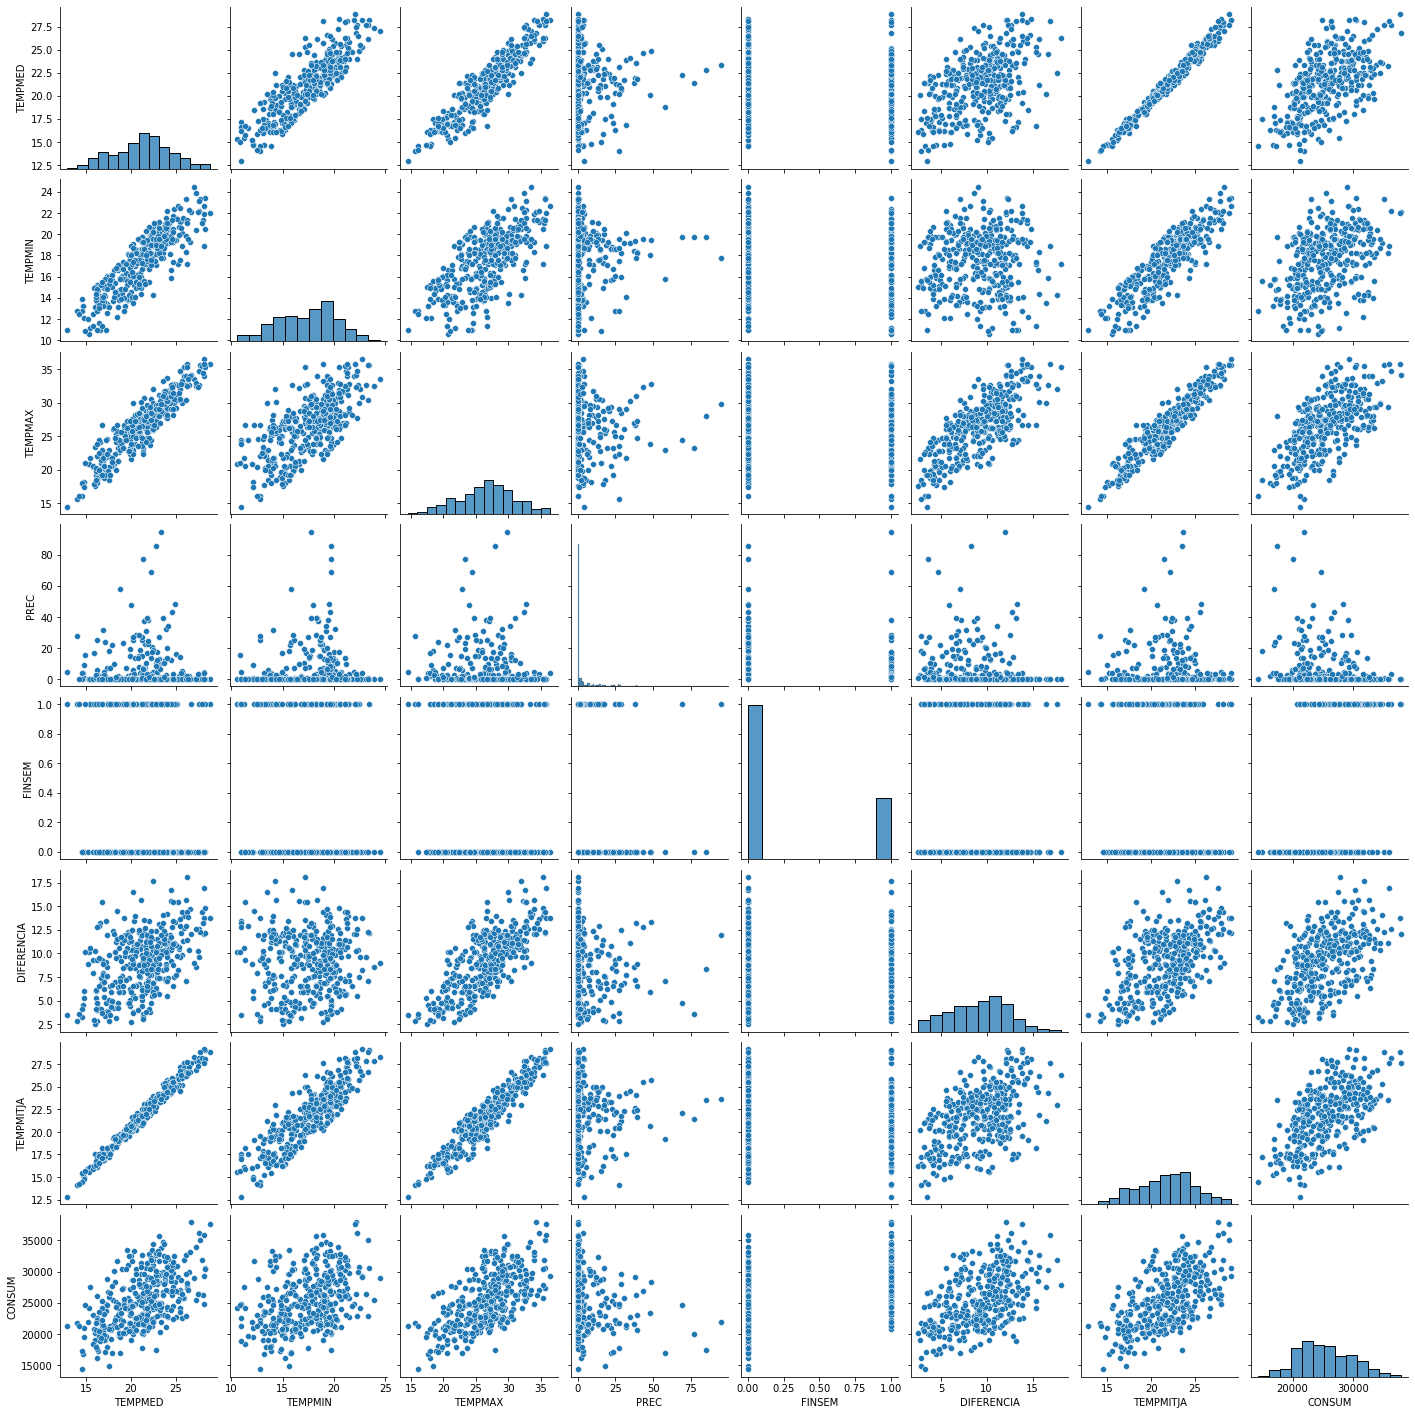

In [45]:
dataset.hist(figsize=(12, 12))
rel = sns.pairplot(dataset)

# Fem tests de les distribucions

Primer fem test per a veure quins son els attributs amb una distribució normal.

Després fem tests amb el atributs no normals per intentar trobar la distribució.

In [46]:
data = dataset.values
attributes = data[:, 1:]

for idx, attribute in enumerate(attributes.T):

    stat, p = normaltest(attribute)
    alpha = .05

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{dataset.columns[idx + 1]}: The null hypothesis can be rejected")
    else:
        print(f"{dataset.columns[idx + 1]}: The null hypothesis cannot be rejected (comes from a normal dist)")

TEMPMED: The null hypothesis cannot be rejected (comes from a normal dist)
TEMPMIN: The null hypothesis can be rejected
TEMPMAX: The null hypothesis cannot be rejected (comes from a normal dist)
PREC: The null hypothesis can be rejected
FINSEM: The null hypothesis can be rejected
DIFERENCIA: The null hypothesis can be rejected
TEMPMITJA: The null hypothesis cannot be rejected (comes from a normal dist)
CONSUM: The null hypothesis can be rejected


Veiem que només TEMPMED, TEMPMAX, TEMPMITJA passen el test normal i per tant son els unics atributs que tenen una distribució normal.

Fem més tests amb kstest per trobar les distribucions que no son normals.

In [47]:
def get_best_distribution(data):
    dist_names = ["norm", "expon", "exponweib", "gamma", "weibull_max", "weibull_min", "pareto"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

for idx, attribute in enumerate(attributes.T):
    attribute = attribute.astype(float)
    print()
    print(f"Checking distribution for {dataset.columns[idx + 1]}")
    get_best_distribution(attribute)


Checking distribution for TEMPMED
p value for norm = 0.4141054004329847
p value for expon = 7.898135108252023e-26
p value for exponweib = 5.152369437201169e-138
p value for gamma = 0.33245410381629237
p value for weibull_max = 6.271911886501876e-174
p value for weibull_min = 7.362755221458028e-189
p value for pareto = 2.3666291155656745e-34
Best fitting distribution: norm
Best p value: 0.4141054004329847
Parameters for the best fit: (21.226356164383564, 3.1757483655614323)

Checking distribution for TEMPMIN
p value for norm = 0.03900400150940175
p value for expon = 2.873549443357314e-23
p value for exponweib = 0.40134842374024726
p value for gamma = 0.024807978338241776
p value for weibull_max = 2.7686557538724396e-189
p value for weibull_min = 0.1381282904611767
p value for pareto = 3.6432815369957574e-32
Best fitting distribution: exponweib
Best p value: 0.40134842374024726
Parameters for the best fit: (0.36594389839487174, 5.663574446037258, 10.116390565328174, 10.318940312617368)


Estas son las distribuciones que encontramos.

## Descartem atributs

Com que les precipitacions no tenen correlacio amb el consum, i tampoc segueixen una distribució Gaussiana, el descartem.
Com que la temperatura mínima te correlació baixa, la descartem també.
I com hem descartat alguns valors, actualitzem els valors a x.

In [48]:
dataset2 = dataset.drop(['DATA'], axis=1)

data = dataset2.values
x = data[:, :-1]
y = data[:, -1]

# Apartat B

In [49]:
## APARTADO B

import math
import numpy as np #importem la llibreria
np.warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def linearReg(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()
    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)
    # Retornem el model entrenat
    return regr

def lassoReg(x, y):
    regr = Lasso()
    regr.fit(x, y)
    return regr

def ridgeReg(x, y):
    regr = Ridge()
    regr.fit(x, y)
    return regr

def elasticReg(x, y):
    regr = ElasticNet()
    regr.fit(x, y)
    return regr


In [50]:
def normalize(x_train):
    minimum = x_train.min(0)
    maximum = x_train.max(0)
    x_t = x_train - minimum 
    x_t /= maximum - minimum
    return x_t

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

def standarize_y(y):
    mean = y.mean()
    std = y.std()
    y_t = y - mean
    y_t /= std
    return y_t

x = x.astype(float)
y = y.astype(float)

no_std_x = x.copy()
norm_x = normalize(x)
std_x = standarize(x)

no_std_y = y.copy()
norm_y = normalize(y)
std_y = standarize_y(y)


In [51]:
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(no_std_x, no_std_y, test_size=0.2)

regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()

print("Linear Regression sense normalitzar:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))


x_train, x_test, y_train, y_test = train_test_split(norm_x, norm_y, test_size=0.2)

regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Linear Regression normalized:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))


x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2)

regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Linear Regression standarized:")
print("Error MSE: %f" % (error))
print("R2 score: %f" % (r2))
print("R2 score (K-Fold): %f" % (kfold_score))



Linear Regression sense normalitzar:
Error MSE: 5526200.276893
R2 score: 0.732039
R2 score (K-Fold): 0.680457

Linear Regression normalized:
Error MSE: 0.009045
R2 score: 0.712822
R2 score (K-Fold): 0.704218

Linear Regression standarized:
Error MSE: 0.262193
R2 score: 0.765891
R2 score (K-Fold): 0.690871


In [52]:
x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2)

from sklearn.metrics import r2_score

print("Linear Regression per atributs:")
print(*dataset2.columns[:-1])
for i in range(len(dataset2.columns[:-1])):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_test[:,i] # seleccionem atribut i en conjunt de test.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = linearReg(x_t, y_train)    
    error = mse(y_test, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_test, regr.predict(x_v))
    kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()

    print()
    print("Error en atribut %s: %f" %(dataset2.columns[i], error))
    print("R2 score en atribut %s: %f" %(dataset2.columns[i], r2))
    print("R2 score (K-Fold) en atribut %s: %f" % (dataset2.columns[i], kfold_score))

regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Linear Regression:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = lassoReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Lasso:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = ridgeReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Ridge:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = elasticReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("ElasticNet:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

Linear Regression per atributs:
TEMPMED TEMPMIN TEMPMAX PREC FINSEM DIFERENCIA TEMPMITJA

Error en atribut TEMPMED: 0.520750
R2 score en atribut TEMPMED: 0.377901
R2 score (K-Fold) en atribut TEMPMED: 0.710110

Error en atribut TEMPMIN: 0.670951
R2 score en atribut TEMPMIN: 0.198467
R2 score (K-Fold) en atribut TEMPMIN: 0.710110

Error en atribut TEMPMAX: 0.470594
R2 score en atribut TEMPMAX: 0.437818
R2 score (K-Fold) en atribut TEMPMAX: 0.710110

Error en atribut PREC: 0.790154
R2 score en atribut PREC: 0.056065
R2 score (K-Fold) en atribut PREC: 0.710110

Error en atribut FINSEM: 0.659358
R2 score en atribut FINSEM: 0.212316
R2 score (K-Fold) en atribut FINSEM: 0.710110

Error en atribut DIFERENCIA: 0.691045
R2 score en atribut DIFERENCIA: 0.174463
R2 score (K-Fold) en atribut DIFERENCIA: 0.710110

Error en atribut TEMPMITJA: 0.513382
R2 score en atribut TEMPMITJA: 0.386703
R2 score (K-Fold) en atribut TEMPMITJA: 0.710110

Linear Regression:
Error MSE: 0.232435
R2 score: 0.722328
R2

In [53]:
dataset3 = dataset.drop(['DATA', 'PREC'], axis=1)

data = dataset3.values
x = data[:, :-1]
y = data[:, -1]

x = x.astype(float)
y = y.astype(float)

std_x = standarize(x)


In [54]:
regr = linearReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Linear Regression:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = lassoReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Lasso:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = ridgeReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("Ridge:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))

regr = elasticReg(x_train, y_train)
error = mse(y_test, regr.predict(x_test)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test))
kfold_score = cross_val_score(regr, x_train, y_train, scoring='r2', cv=5).mean()
print()
print("ElasticNet:")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))


Linear Regression:
Error MSE: 0.232435
R2 score: 0.722328
R2 score (K-Fold): 0.710110

Lasso:
Error MSE: 0.838049
R2 score: -0.001151
R2 score (K-Fold): -0.011851

Ridge:
Error MSE: 0.238156
R2 score: 0.715493
R2 score (K-Fold): 0.711871

ElasticNet:
Error MSE: 0.714462
R2 score: 0.146488
R2 score (K-Fold): 0.125563


# PCA

PCA_1 - MSE: 0.735; R2: 0.341; R2 K-Fold: 0.345
PCA_2 - MSE: 0.518; R2: 0.535; R2 K-Fold: 0.503
PCA_3 - MSE: 0.333; R2: 0.701; R2 K-Fold: 0.678
PCA_4 - MSE: 0.328; R2: 0.705; R2 K-Fold: 0.677
PCA_5 - MSE: 0.341; R2: 0.694; R2 K-Fold: 0.674


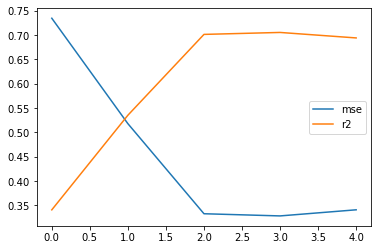

In [55]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2)

mses, r2s = [], []
for i in range(1, x_train.shape[1]):
    pca = PCA(n_components=i)
    x_train_transformed = pca.fit_transform(x_train)
    x_test_transformed = pca.transform(x_test)

    linear_model = LinearRegression()
    linear_model.fit(x_train_transformed, y_train)
    preds = linear_model.predict(x_test_transformed)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    kfold_score = cross_val_score(linear_model, x_train_transformed, y_train, scoring='r2', cv=5).mean()
    print(f"PCA_{i} - MSE: {mse:.3f}; R2: {r2:.3f}; R2 K-Fold: {kfold_score:.3f}")
    
    mses.append(mse)
    r2s.append(r2)
    
plt.plot(mses, label='mse')
plt.plot(r2s, label='r2')
plt.legend()
plt.show()


# Regresió polinomial

In [56]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(std_x, std_y, test_size=0.2)

poly = PolynomialFeatures(degree=2, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = linearReg(x_train_poly, y_train)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 2):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))


poly = PolynomialFeatures(degree=3, include_bias=False)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

regr = linearReg(x_train_poly, y_train)

error = mean_squared_error(y_test, regr.predict(x_test_poly)) # calculem error
r2 = r2_score(y_test, regr.predict(x_test_poly))
kfold_score = cross_val_score(regr, x_train_poly, y_train, scoring='r2', cv=5).mean()
print()
print("PloynomialRegression (degree = 3):")
print("Error MSE: %f" %( error))
print("R2 score: %f" %( r2))
print("R2 score (K-Fold): %f" % (kfold_score))



PloynomialRegression (degree = 2):
Error MSE: 0.388567
R2 score: 0.690417
R2 score (K-Fold): 0.670780

PloynomialRegression (degree = 3):
Error MSE: 0.425376
R2 score: 0.661090
R2 score (K-Fold): 0.627054


Ens empitjora el resultat

In [57]:
# APARTADO A

import numpy as np

class Regressor(object):
    def __init__(self, w0, w1, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass
    
    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        self.weights = self.weights - self.alpha / m * (X.transpose() * (X * self.weights - y));
    
    def train(self, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterations = 0            
        pass
    
    
class RegressorProba(object):
    def __init__(self, w0, weights, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.weights = weights
        self.alpha = alpha
        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        return np.dot(x, self.weights) + self.w0
    
    def __update(self, X, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        m = len(y)
        self.weights = self.weights - self.alpha / m * (X.transpose() * (X * self.weights - y));
        
    def __gradients(self, x, real_y, predicted_y):
        error = predicted_y - real_y
        w0_gradient = (1 / len(real_y)) * np.sum(error)
        weights_gradients = (1 / len(real_y)) * np.matmul(x.transpose(), error)
        
        return w0_gradient, weights_gradients
        
    def __update_weights(self, w0_diff, weight_diffs):
        self.w0 = self.w0 - self.alpha * w0_diff
        self.weights = self.weights - self.alpha * weight_diffs
    
    def train(self, x, y, max_iter, epsilon):
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        iterations = 0
        old_w0 = self.w0
        old_weights = self.weights.copy()
        while iterations < max_iter:
            predicted_y = self.predict(x)
            
            w0_diff, weight_diffs = self.__gradients(x, y, predicted_y)
                        
            self.__update_weights(w0_diff, weight_diffs)
    
            if abs(self.w0 - old_w0) < epsilon and np.allclose(self.weights, old_weights, atol=epsilon):
                return
            
            old_w0 = self.w0
            old_weights = self.weights
            iterations += 1

            
regr = RegressorProba(1, np.ones(len(x_train[0]), dtype=float), 0.1)

regr.train(x_train, y_train, 100000, 0.001)

y_predict = regr.predict(x_test)

error = mse(y_test, y_predict) # calculem error
r2 = r2_score(y_test, y_predict)
print("CUSTOM Linear Regression:")
print("Error: %f" %( error))
print("R2 score: %f" %( r2))


TypeError: 'numpy.float64' object is not callable